<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/Project_1_corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import data**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U scikit-learn==1.4
from pandas.plotting import scatter_matrix


#import dataset
pizza = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_v2.csv")
print(pizza.head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0         yes          yes              no  
1         yes          yes              no  
2         yes          yes             yes  
3         yes           no             yes  
4         yes           no             yes  


In [2]:
pizza_df=pd.DataFrame(pizza)

# **Splitting dataset**
Predicting the company name based on certain features - had to leave the company feature out of the columns variable because it would split it and then when setting y & X, you can only call one variable.

Had to borrow the kaggle code for splitting the data b/c the class code gave me errors

[Kaggle code - code 11](https://www.kaggle.com/code/chloe912/pizza-price-prediction)



In [3]:



columns = ['topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']
pizza_df = pd.concat([pizza]+[pd.get_dummies(pizza[i],drop_first=True) for i in columns],axis=1)
pizza_df.drop(columns,axis=1,inplace=True)
pizza_df.head(3)

,company,price_cad,diameter_in,black_pepper,chicken,meat,mozzarella,mushrooms,onion,pepperoni,...,super_supreme,thai_veggie,jumbo,large,medium,regular,small,yes,yes,yes
0,A,29,22.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,A,25,20.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,A,19,16.0,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


In [4]:
#predicting the company name based on certain features
y = pizza_df['company']
print(y)


0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object


In [5]:
#dropped the features that are probably not relevant to the model
X = pizza_df.drop(['company'], axis=1)
print(X)

     price_cad  diameter_in  black_pepper  chicken   meat  mozzarella  \
0           29         22.0         False     True  False       False   
1           25         20.0         False    False  False       False   
2           19         16.0         False    False  False       False   
3           22         14.0         False    False  False       False   
4           30         18.0         False    False  False        True   
..         ...          ...           ...      ...    ...         ...   
124         11          8.5         False    False  False       False   
125         14         12.0         False    False  False       False   
126         17         14.0         False    False  False       False   
127         12          8.5         False    False   True       False   
128         15         12.0         False    False   True       False   

     mushrooms  onion  pepperoni  sausage  ...  super_supreme  thai_veggie  \
0        False  False      False    False  ..

In [6]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
#if we don't stratify, then it will randomly take classes
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

## **Inspect data**

In [9]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            129 non-null    object 
 1   price_cad          129 non-null    int64  
 2   diameter_in        129 non-null    float64
 3   black_pepper       129 non-null    bool   
 4   chicken            129 non-null    bool   
 5   meat               129 non-null    bool   
 6   mozzarella         129 non-null    bool   
 7   mushrooms          129 non-null    bool   
 8   onion              129 non-null    bool   
 9   pepperoni          129 non-null    bool   
 10  sausage            129 non-null    bool   
 11  smoked_beef        129 non-null    bool   
 12  tuna               129 non-null    bool   
 13  vegetables         129 non-null    bool   
 14  BBQ_sausage        129 non-null    bool   
 15  american_classic   129 non-null    bool   
 16  american_favorite  129 non

In [10]:
pizza_df.describe()

,price_cad,diameter_in
count,129.000000,129.000000
mean,15.604651,12.976744
std,3.975351,3.272674
min,10.000000,8.000000
25%,12.000000,12.000000
50%,15.000000,12.000000
75%,17.000000,14.000000
max,30.000000,22.000000


## Global check of dataset for any missing values

In [11]:
pizza_df.isnull().values.any()

False

# Histogram plot seems to indicate the data is slightly right-skewed.

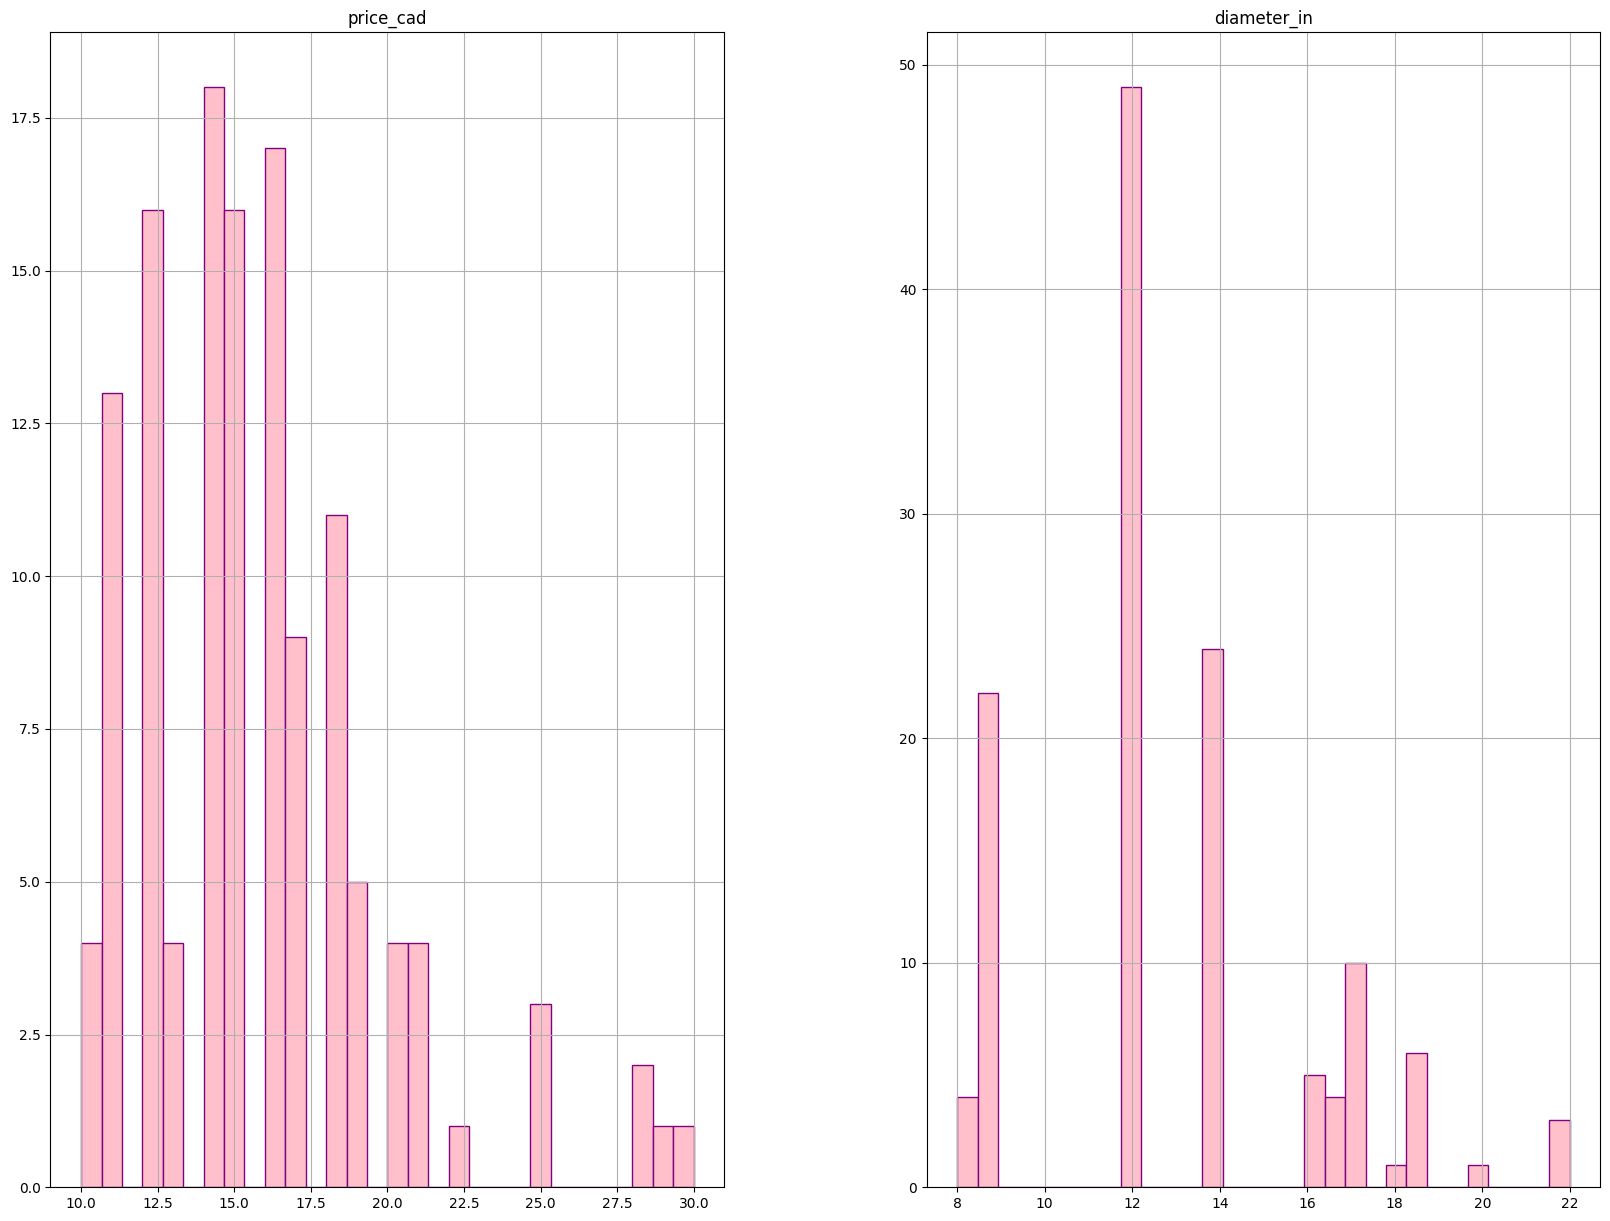

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
pizza_df.hist(bins=30, figsize=(20,15), color='pink', ec='purple') #changed fill and edge color
plt.show()

### Scatterplot suggests that overall price and diameter size are more-or-less directly proportional.

<Axes: xlabel='price_cad', ylabel='diameter_in'>

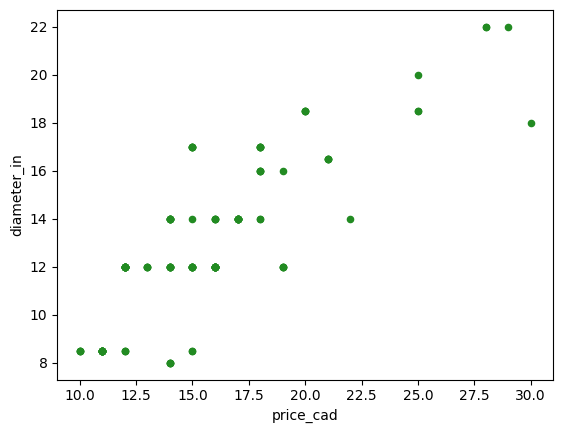

In [13]:
pizza_df.plot(kind="scatter", x="price_cad", y="diameter_in", color="forestgreen")

<Axes: xlabel='price_cad', ylabel='diameter_in'>

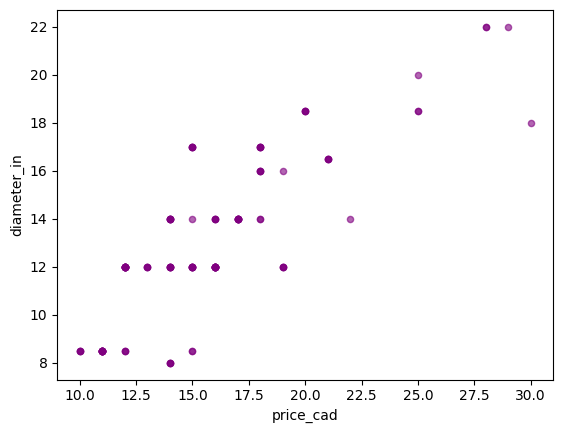

In [14]:
pizza_df.plot(kind="scatter", x="price_cad", y="diameter_in", alpha=0.6, color='purple')

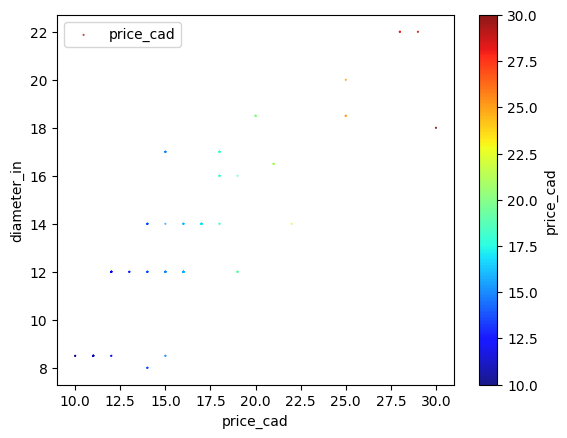

In [15]:
pizza_df.plot(kind="scatter", x="price_cad", y="diameter_in", alpha=0.9,
         s=pizza["price_cad"]/100, label="price_cad",
         c="price_cad", cmap=plt.get_cmap("jet"), colorbar=True,
     )
plt.legend()

array([[<Axes: xlabel='price_cad', ylabel='price_cad'>,
        <Axes: xlabel='diameter_in', ylabel='price_cad'>],
       [<Axes: xlabel='price_cad', ylabel='diameter_in'>,
        <Axes: xlabel='diameter_in', ylabel='diameter_in'>]], dtype=object)

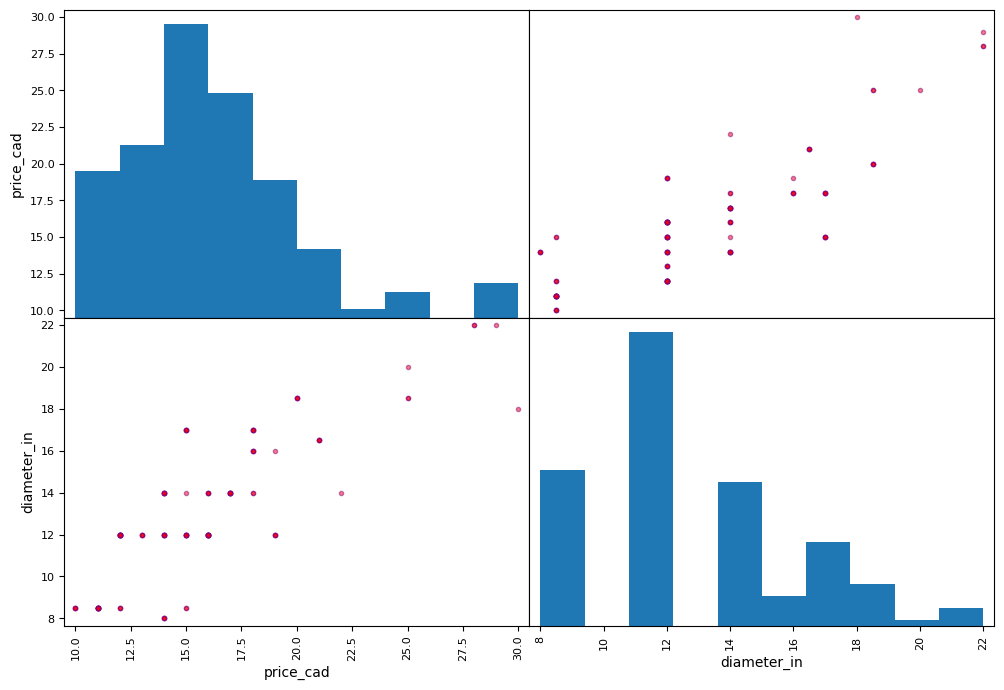

In [16]:
#Can see effects of the data skewed
from pandas.plotting import scatter_matrix

attributes = ["price_cad", "diameter_in"] #will plot these 4 col of data
scatter_matrix(pizza[attributes], figsize=(12, 8), color='red', ec='purple')

### Correlation matrix shows a strong positive correlation between diameter inches and prices in Canadian dollars

In [17]:
corr_matrix = pizza_df[attributes].corr()
corr_matrix['price_cad'].sort_values(ascending=False)

price_cad      1.000000
diameter_in    0.814464
Name: price_cad, dtype: float64

In [18]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder

pizza_cat = pizza_df['price_cad'].values.reshape(-1,1)



cat_encoder = OneHotEncoder()
pizza_cat_1hot = cat_encoder.fit_transform(pizza_cat)
pizza_cat_1hot

<129x17 sparse matrix of type '<class 'numpy.float64'>'
	with 129 stored elements in Compressed Sparse Row format>

In [19]:
pizza_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **Binning**

In [20]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(pizza_df['price_cad'].values.reshape(-1, 1))
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([10., 12., 14., 16., 18., 20., 22., 24., 26., 28., 30.])]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [21]:
binned = kb.transform(pizza_df['price_cad'].values.reshape(-1, 1))
binned

<129x10 sparse matrix of type '<class 'numpy.float64'>'
	with 129 stored elements in Compressed Sparse Row format>

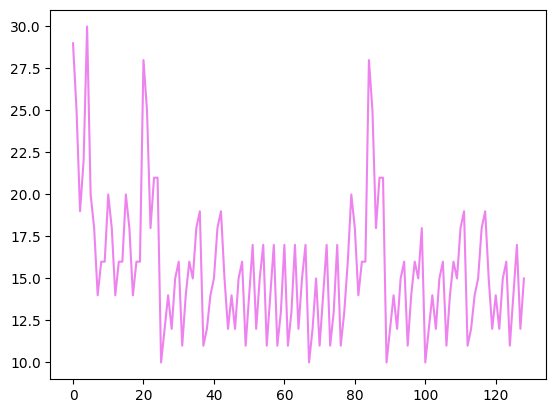

In [22]:
#Create plot of bins
plt.plot(pizza_df['price_cad'].values.reshape(-1, 1), color='violet')
plt.show()

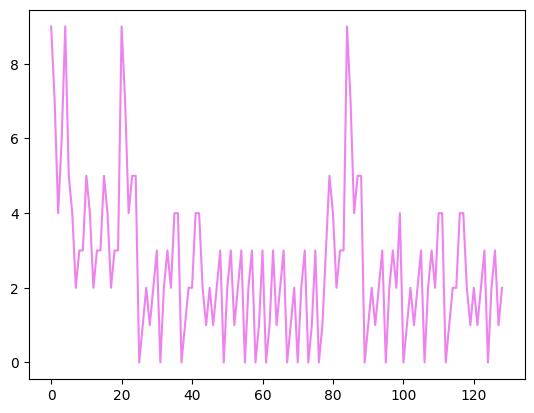

In [23]:
plt.plot(binned.argmax(1), color='violet')
plt.show()

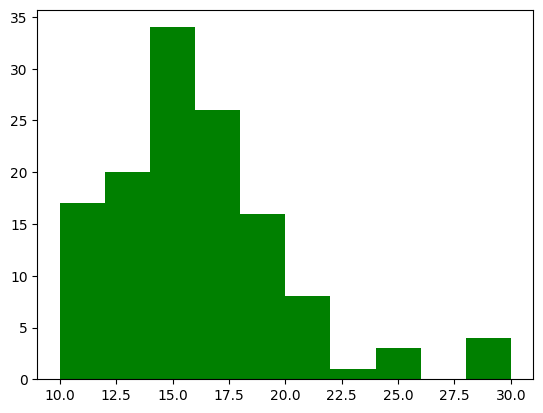

In [24]:
#Create histogram of price with 10 bins
plt.hist(pizza_df['price_cad'].values.reshape(-1, 1), bins=10, color='green')
plt.show()

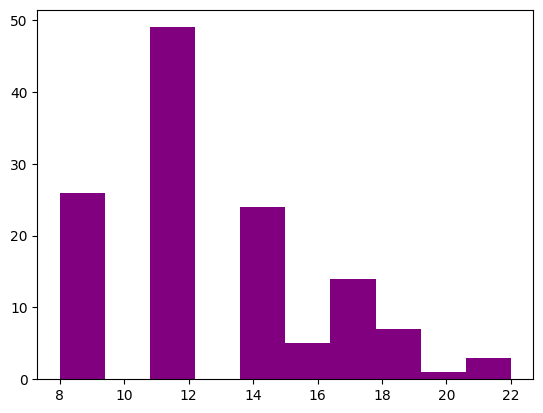

In [25]:
#Create histogram of diameter with 10 bins
plt.hist(pizza_df['diameter_in'].values.reshape(-1, 1), bins=10, color='purple')
plt.show()

# **Transformations**
Will apply the below transformations for price_cad & diameter_in


1.   Squaring
2.   Cubing
3.   np.log
4.   np.exp






ORIGINAL - price_cad

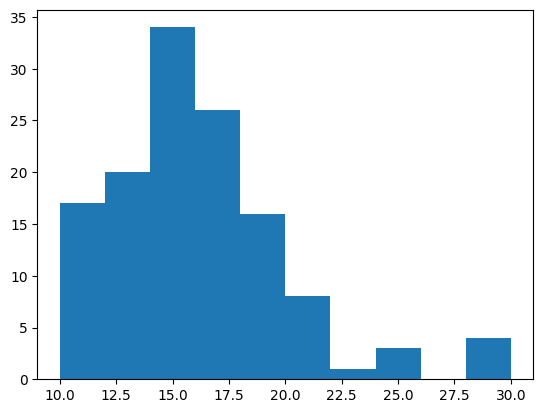

In [26]:
plt.hist(pizza_df['price_cad'].values.reshape(-1, 1))
plt.show()

SQUARED - price_cad

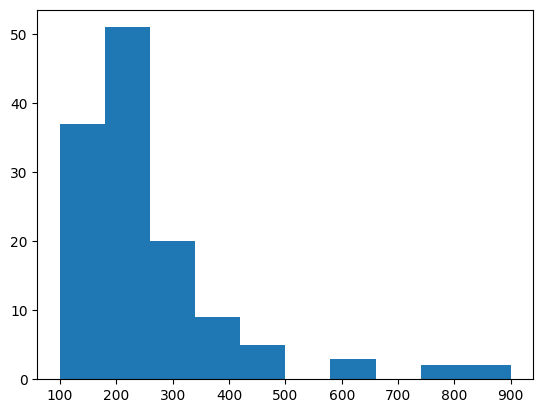

In [27]:
plt.hist(pizza_df['price_cad'].values.reshape(-1, 1)**2, bins=10)
plt.show()

CUBED - price_cad

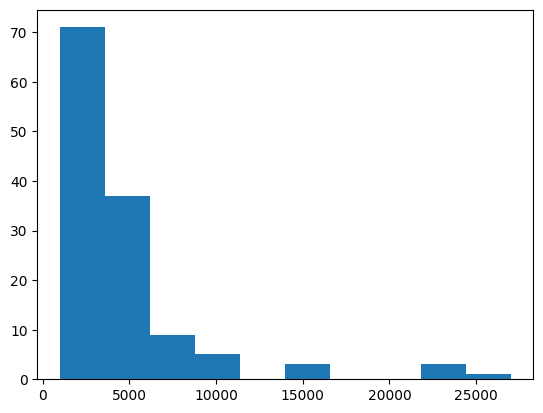

In [28]:
plt.hist(pizza_df['price_cad'].values.reshape(-1, 1)**3, bins=10)
plt.show()

NP.LOG - price_cad


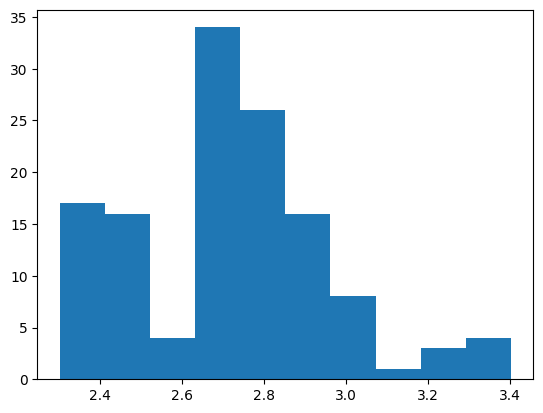

In [29]:
plt.hist(np.log(pizza_df['price_cad'].values.reshape(-1, 1)), bins=10)
plt.show()

NP.EXP - price_cad

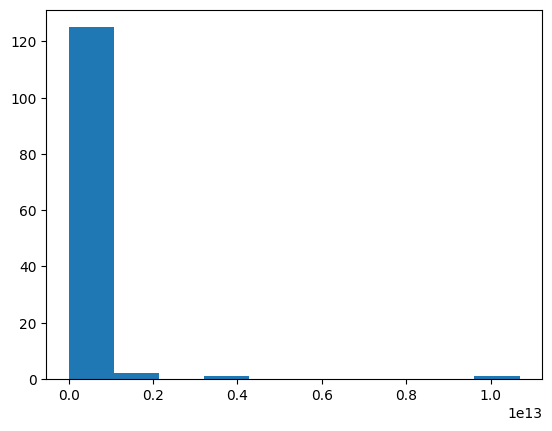

In [30]:
plt.hist(np.exp(pizza_df['price_cad'].values.reshape(-1, 1)), bins=10)
plt.show()

## Transformation for diameter_in - rerun the same ones as above

ORIGINAL - diameter_in

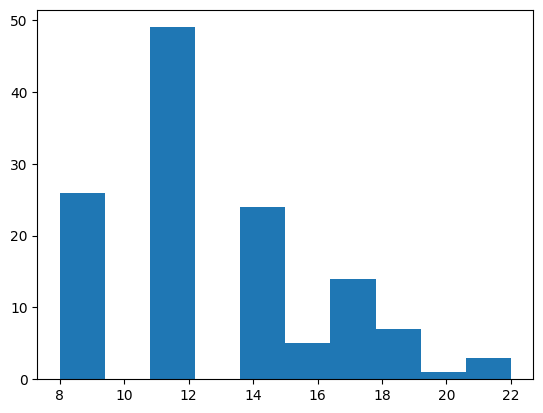

In [31]:
plt.hist(pizza_df['diameter_in'].values.reshape(-1, 1))
plt.show()

SQUARED - diameter_in

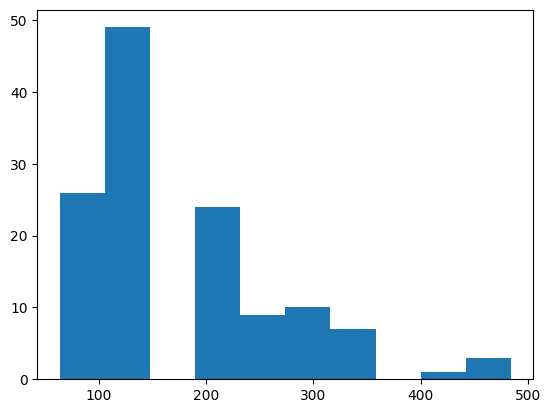

In [32]:
plt.hist(pizza_df['diameter_in'].values.reshape(-1, 1)**2, bins=10)
plt.show()

CUBED - diameter_in

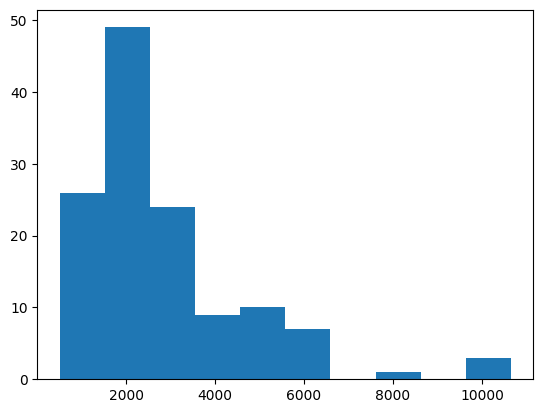

In [33]:
plt.hist(pizza_df['diameter_in'].values.reshape(-1, 1)**3, bins=10)
plt.show()

NP.LOG - diameter_in

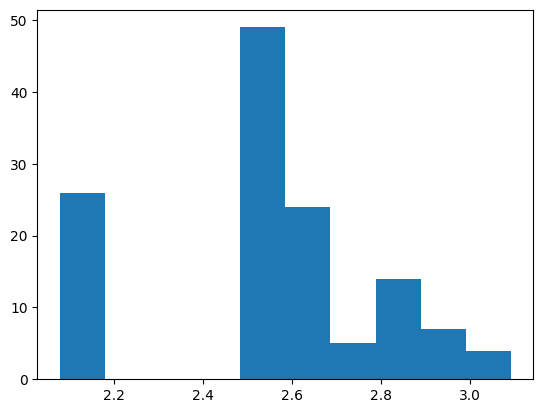

In [34]:
plt.hist(np.log(pizza_df['diameter_in'].values.reshape(-1, 1)), bins=10)
plt.show()

NP.EXP - diameter_in

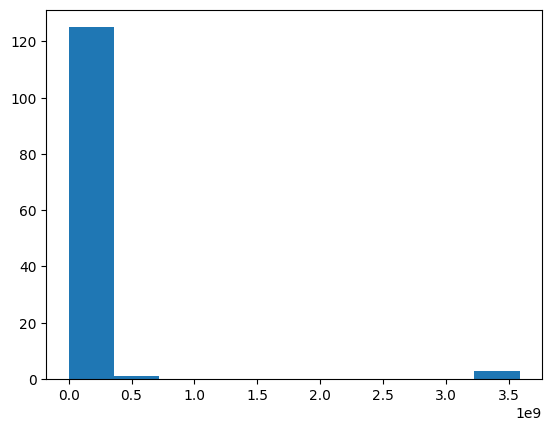

In [35]:
plt.hist(np.exp(pizza_df['diameter_in'].values.reshape(-1, 1)), bins=10)
plt.show()

## Transformation scatter matrices

array([[<Axes: xlabel='price_cad', ylabel='price_cad'>,
        <Axes: xlabel='diameter_in', ylabel='price_cad'>],
       [<Axes: xlabel='price_cad', ylabel='diameter_in'>,
        <Axes: xlabel='diameter_in', ylabel='diameter_in'>]], dtype=object)

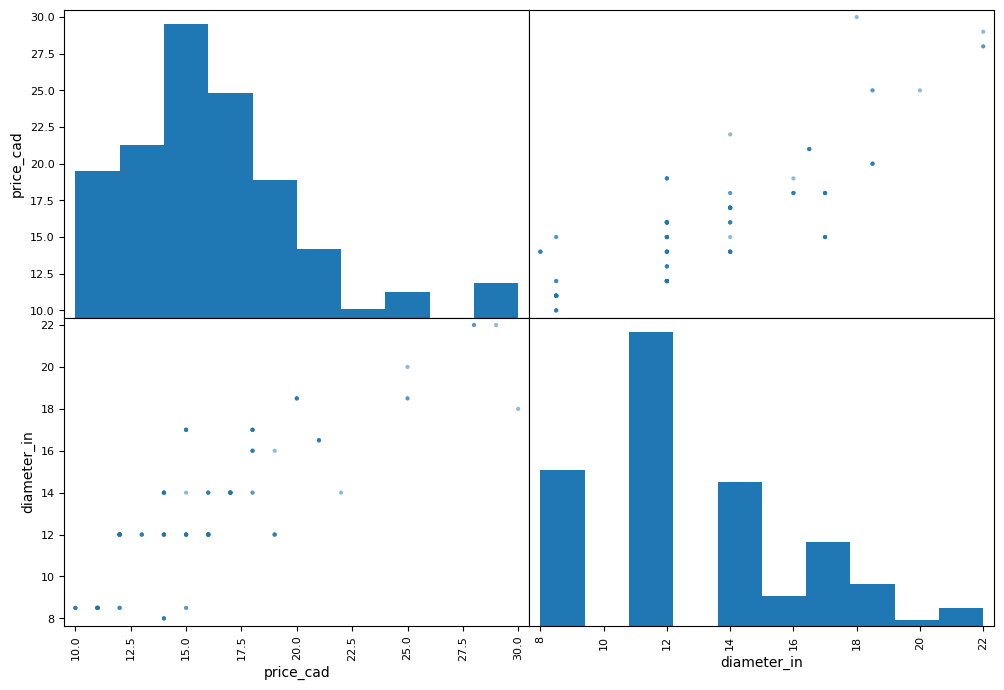

In [36]:
#Original scatter matrix for price_cad and diameter_in

attributes = ["price_cad", "diameter_in"]
scatter_matrix(pizza_df[attributes], figsize=(12, 8))

Squared scattered matrices

array([[<Axes: xlabel='price_cad', ylabel='price_cad'>,
        <Axes: xlabel='diameter_in', ylabel='price_cad'>],
       [<Axes: xlabel='price_cad', ylabel='diameter_in'>,
        <Axes: xlabel='diameter_in', ylabel='diameter_in'>]], dtype=object)

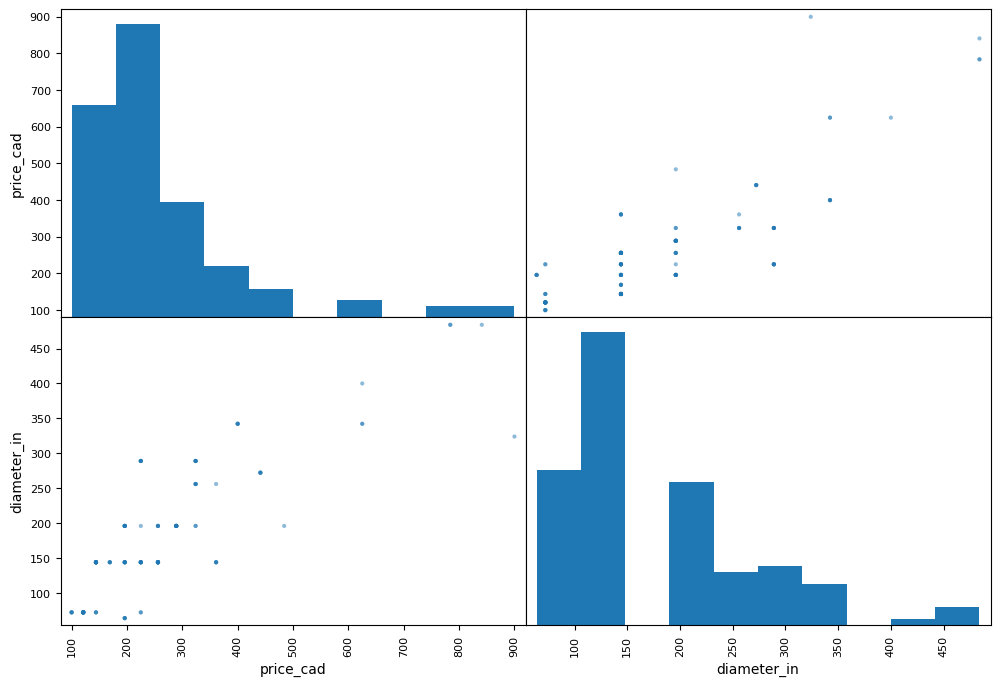

In [37]:
scatter_matrix(pizza_df[attributes]**2, figsize=(12, 8))

CUBED scattered matrices

array([[<Axes: xlabel='price_cad', ylabel='price_cad'>,
        <Axes: xlabel='diameter_in', ylabel='price_cad'>],
       [<Axes: xlabel='price_cad', ylabel='diameter_in'>,
        <Axes: xlabel='diameter_in', ylabel='diameter_in'>]], dtype=object)

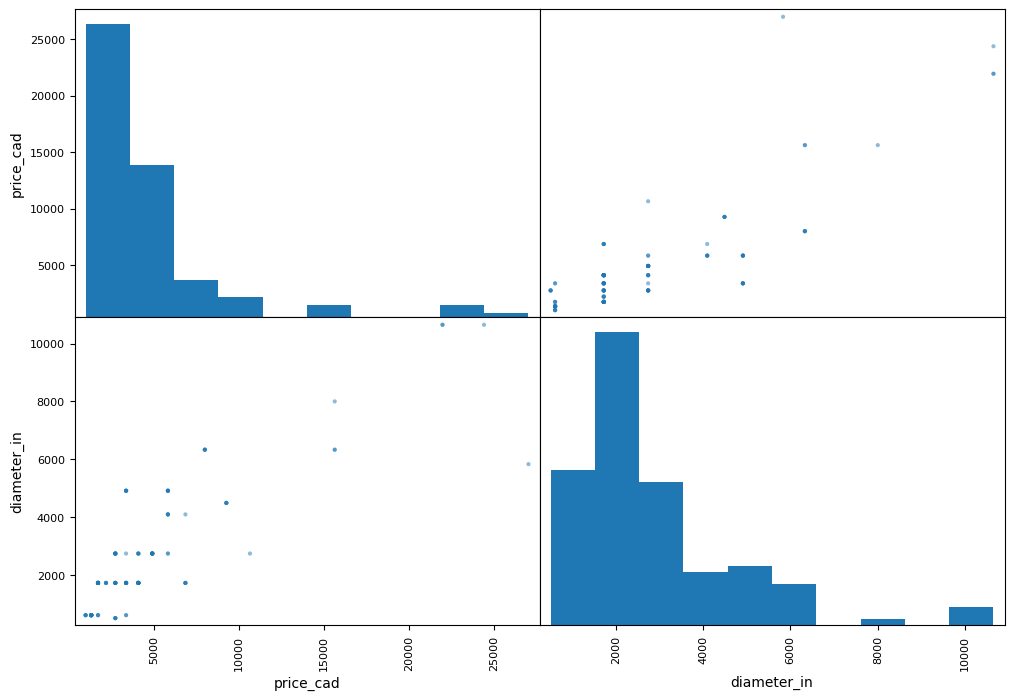

In [38]:
scatter_matrix(pizza_df[attributes]**3, figsize=(12, 8))